# Dfsu - spectral data

MIKE 21 SW can output full spectral information in points, along lines or in an area. In all these cases data are stored in dfsu files with additional axes: frequency and directions. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mikeio import Dfsu

%load_ext autoreload
%autoreload 2

In [2]:
def ReadAllStaticItems(filename):
    from mikecore.DfsFileFactory import DfsFileFactory
    dfs = DfsFileFactory.DfsGenericOpen(filename)
    static_items = {}
    for _ in range(20):
        try:
            si = dfs.ReadStaticItemNext()
            static_items[si.Name] = si.Data
        except:
            continue
    dfs.Close()
    return static_items

def ReadFrequenciesAndDirectionsFromSpectrumDfsu(filename):
    static_items = ReadAllStaticItems(filename)
    return static_items["Frequency"], static_items["Direction"]

## Read dfsu point spectrum

In [3]:
fn = "../tests/testdata/pt_spectra.dfsu"

In [4]:
ReadAllStaticItems(fn).keys()

dict_keys(['Node id', 'X-coord', 'Y-coord', 'Z-coord', 'Code', 'Element id', 'Element type', 'No of nodes', 'Connectivity', 'Frequency', 'Direction'])

In [5]:
f, dir = ReadFrequenciesAndDirectionsFromSpectrumDfsu(fn)
nf = len(f)
nd = len(dir)

In [6]:
dfs = Dfsu(fn)
dfs

DfsuSpectral0D
Number of elements: None
Number of nodes: None
Projection: LONG/LAT
Number of sigma layers: None
Items:
  0:  Point 1: Energy density <Wave energy density> (meter pow 2 sec per deg)
Time: 31 steps with dt=600.0s
      2017-10-27 00:00:00 -- 2017-10-27 05:00:00

In [7]:
cb = dfs._source.dfsFile.FileInfo.CustomBlocks[0]
customBlock = [cb[j] for j in range(cb.Count)]
customBlock

[-1372877872, 508, 0, 0, 131074, 16]

In [8]:
ds = dfs.read(time_steps=0)
ds[0] = ds[0].reshape(1,nd,nf)
spec = np.squeeze(ds[0])

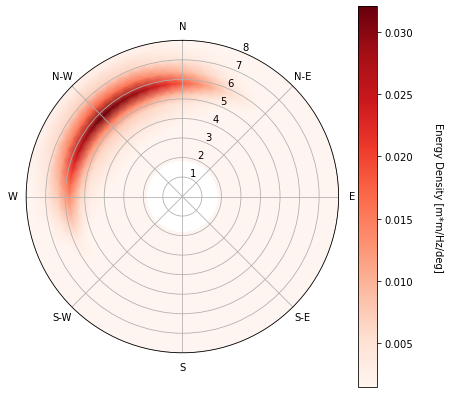

In [9]:
ax = dfs.plot_spectrum(spec, r_as_periods=True, rmax=8, vmin=0.0015, plot_type="shaded");

## Dfsu line spectrum

In [10]:
fn = "../tests/testdata/line_spectra.dfsu"

In [11]:
static_items = ReadAllStaticItems(fn)

In [12]:
f, dir = ReadFrequenciesAndDirectionsFromSpectrumDfsu(fn)
nf = len(f)
nd = len(dir)

In [13]:
dfs = Dfsu(fn)
dfs

DfsuSpectral1D
Number of elements: 9
Number of nodes: 10
Projection: LONG/LAT
Number of sigma layers: None
Items:
  0:  Energy density <Wave energy density> (meter pow 2 sec per deg)
Time: 4 steps with dt=6000.0s
      2017-10-27 00:00:00 -- 2017-10-27 05:00:00

In [14]:
cb = dfs._source.dfsFile.FileInfo.CustomBlocks[0];
customBlock = [cb[j] for j in range(cb.Count)]
customBlock

[10, 9, 1, 0, 25, 16]

In [15]:
ds = dfs.read(time_steps=0)  

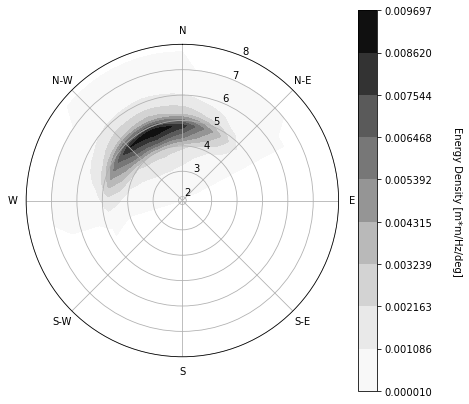

In [16]:
spec = np.squeeze(ds[0][0,3,:,:])  # note first 3 points are outside domain
dfs.plot_spectrum(spec, cmap="Greys", rmax=8, r_as_periods=True);

## Dfsu area spectrum

In [17]:
fn = "../tests/testdata/area_spectra.dfsu"

In [18]:
f, dir = ReadFrequenciesAndDirectionsFromSpectrumDfsu(fn)
nf = len(f)
nd = len(dir)

In [19]:
static_items = ReadAllStaticItems(fn)

In [20]:
dfs = Dfsu(fn)
dfs

DfsuSpectral2D
Number of elements: 40
Number of nodes: 33
Projection: LONG/LAT
Items:
  0:  Energy density <Wave energy density> (meter pow 2 sec per deg)
Time: 3 steps with dt=9000.0s
      2017-10-27 00:00:00 -- 2017-10-27 05:00:00

In [21]:
cb = dfs._source.dfsFile.FileInfo.CustomBlocks[0];
customBlock = [cb[j] for j in range(cb.Count)]
customBlock

[33, 40, 2, 0, 25, 16]

In [22]:
ds = dfs.read()

In [23]:
from ipywidgets import interact
from datetime import timedelta

In [24]:
@interact
def plot_element(id=(0,dfs.n_elements-1), step=(0,dfs.n_timesteps-1)):
    spec = np.squeeze(ds[0][step,id])
    time = dfs.start_time + timedelta(seconds=(step*dfs.timestep))
    dfs.plot_spectrum(spec, vmax=0.04, vmin=0, rmax=8, title=f"Wave spectrum, {time}, element: {id}");
    plt.show()

interactive(children=(IntSlider(value=19, description='id', max=39), IntSlider(value=1, description='step', ma…